# Analysis of Yelp Business Intelligence Data

We will analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from Kaggle although we have taken steps to pull this data into a publis s3 bucket: `s3://cis9760-yelpdataset/yelp-light/*business.json`

# Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install `pandas` and `matplotlib`

In [1]:
%%info

In [2]:
sc.install_pypi_package( "IPython" )

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1651374988795_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
sc.install_pypi_package( "matplotlib==3.2.1" )
sc.install_pypi_package( "pandas==1.0.3" )
#sc.install_pypi_package("seaborn==0.11.2")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
sc.install_pypi_package("scipy==1.7.1")
sc.install_pypi_package( "seaborn==0.11.2" )
#import seaborn as sns


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Importing

Now, import the installed packages from the previous block below.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
%matplotlib inline

In [7]:
sc.list_packages() #we are just trying to make seaborn work  here

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version  
-------------------------- ---------
backcall                   0.2.0    
beautifulsoup4             4.9.1    
boto                       2.49.0   
click                      7.1.2    
cycler                     0.11.0   
decorator                  5.1.1    
ipython                    7.33.0   
jedi                       0.18.1   
jmespath                   0.10.0   
joblib                     0.16.0   
kiwisolver                 1.4.2    
lxml                       4.5.2    
matplotlib                 3.2.1    
matplotlib-inline          0.1.3    
mysqlclient                1.4.2    
nltk                       3.5      
nose                       1.3.4    
numpy                      1.16.5   
pandas                     1.0.3    
parso                      0.8.3    
pexpect                    4.8.0    
pickleshare                0.7.5    
pip                        9.0.1    
prompt-toolkit             3.0.29   
ptyprocess                 0.7.0    
p

## Loading Data

We are finally ready to load data. Using spark load the data from S3 into a dataframe object that we can manipulate further down in our analysis.

In [8]:
business_data  = spark.read.json( 's3://yelp-reviews-dataset/yelp_academic_dataset_business.json' )


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
business_data.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+--------------------+--------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|          city|               hours|is_open|  latitude|   longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+--------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|1616 Chapala St, ...|[,,,,,,,,,,, True...|Pns2l4eNsfO8kk83d...|Doctors, Traditio...| Santa Barbara|                null|      0|34.4266787|-119.7111968|Abby Rappoport, L...|      93101|           7|  5.0|   CA|
|87 Grasso Plaza S...|[,,,,,,,,, True,,...|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|        Affton|[8:0-18:30, 0:0-0...|      1| 38.551126|  -90.335695

# Overview of Data

Display the number of rows and columns in our dataset.

In [10]:
columns=len(business_data.columns)
rows=business_data.count()
print('Number of columns in Business table:  '+str(columns))
print('Number of rows in Business table:  '+str(rows))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Business table:  14
Number of rows in Business table:  150346

Display the DataFrame schema below.

In [11]:
business_data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

Display the first 5 rows with the following columns:

* `business_id`
* `name`
* `city`
* `state`
* `categories`

In [12]:
business_data.select(['business_id','name','city','state','categories']).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-------------+-----+--------------------+
|         business_id|                name|         city|state|          categories|
+--------------------+--------------------+-------------+-----+--------------------+
|Pns2l4eNsfO8kk83d...|Abby Rappoport, L...|Santa Barbara|   CA|Doctors, Traditio...|
|mpf3x-BjTdTEA3yCZ...|       The UPS Store|       Affton|   MO|Shipping Centers,...|
|tUFrWirKiKi_TAnsV...|              Target|       Tucson|   AZ|Department Stores...|
|MTSW4McQd7CbVtyjq...|  St Honore Pastries| Philadelphia|   PA|Restaurants, Food...|
|mWMc6_wTdE0EUBKIG...|Perkiomen Valley ...|   Green Lane|   PA|Brewpubs, Breweri...|
+--------------------+--------------------+-------------+-----+--------------------+
only showing top 5 rows

# Analyzing Categories

Let's now answer this question: **how many unique categories are represented in this dataset?**

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

* How many businesses are categorized as `Active Life`, for instance
* What are the top 20 most popular categories available?

## Association Table

We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

For instance, given the following:


| business_id | categories |
|-------------|------------|
| abcd123     | a,b,c      |

We would like to derive something like:

| business_id | category |
|-------------|------------|
| abcd123     | a          |
| abcd123     | b          |
| abcd123     | c          |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from your original yelp dataframe.

In [13]:
from pyspark.sql.functions import split, explode

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
business_data.select('business_id','categories').show(5) #to display how the the orignal structure was

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|          categories|
+--------------------+--------------------+
|Pns2l4eNsfO8kk83d...|Doctors, Traditio...|
|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|
|tUFrWirKiKi_TAnsV...|Department Stores...|
|MTSW4McQd7CbVtyjq...|Restaurants, Food...|
|mWMc6_wTdE0EUBKIG...|Brewpubs, Breweri...|
+--------------------+--------------------+
only showing top 5 rows

Display the first 5 rows of your association table below.

In [15]:
#we will split the categories coloumn so that it maintains atomicity with just one value per row

asso_tab = business_data.select(business_data.business_id, explode(split(business_data.categories, ", "))\
                                       .alias('category'))

asso_tab.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|            category|
+--------------------+--------------------+
|Pns2l4eNsfO8kk83d...|             Doctors|
|Pns2l4eNsfO8kk83d...|Traditional Chine...|
|Pns2l4eNsfO8kk83d...|Naturopathic/Holi...|
|Pns2l4eNsfO8kk83d...|         Acupuncture|
|Pns2l4eNsfO8kk83d...|    Health & Medical|
+--------------------+--------------------+
only showing top 5 rows

# Total Unique Categories

Finally, we are ready to answer the question: **what is the total number of unique categories available?**

Below, implement the code necessary to calculate this figure.

In [16]:
asso_tab.select('category').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1311

## Top Categories By Business

Now let's find the top categories in this dataset by rolling up categories.

### Counts of Businesses / Category

So now, let's unroll our distinct count a bit and display the per count value of businesses per category.

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [17]:
asso_tab.groupby('category').count().show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|            category|count|
+--------------------+-----+
|      Paddleboarding|   98|
|      Dermatologists|  336|
|         Hobby Shops|  552|
|          Bubble Tea|  477|
|             Embassy|    3|
|             Tanning|  667|
|            Handyman|  356|
|      Aerial Fitness|   19|
|             Falafel|  103|
|        Summer Camps|  232|
|       Outlet Stores|  182|
|     Clothing Rental|   37|
|      Sporting Goods| 1662|
|     Cooking Schools|   76|
|  Lactation Services|   27|
|Ski & Snowboard S...|   40|
|             Museums|  413|
|              Doulas|   31|
|                Food|27781|
|         Halotherapy|   23|
+--------------------+-----+
only showing top 20 rows

### Bar Chart of Top Categories

With this data available, let us now build a barchart of the top 20 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

If you want, you can also use seaborn library

In [18]:
temp = asso_tab.groupby('category')\
                    .count()\
                    .orderBy(['count'], ascending = False)
temp.show(5)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+-----+
|     category|count|
+-------------+-----+
|  Restaurants|52268|
|         Food|27781|
|     Shopping|24395|
|Home Services|14356|
|Beauty & Spas|14292|
+-------------+-----+
only showing top 5 rows

In [19]:
df=temp.toPandas()\
    .head(20)\
    .sort_values(ascending = True, by='count')

df.head(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                     category  count
19            Hotels & Travel   5857
18             American (New)   6097
17         Breakfast & Brunch   6239
16                  Fast Food   6472
15               Coffee & Tea   6703
14                      Pizza   7093
13                Active Life   7687
12     American (Traditional)   8139
11                 Sandwiches   8366
10  Event Planning & Services   9895
9                  Automotive  10773
8                        Bars  11065
7              Local Services  11198
6            Health & Medical  11890
5                   Nightlife  12281
4               Beauty & Spas  14292
3               Home Services  14356
2                    Shopping  24395
1                        Food  27781
0                 Restaurants  52268

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

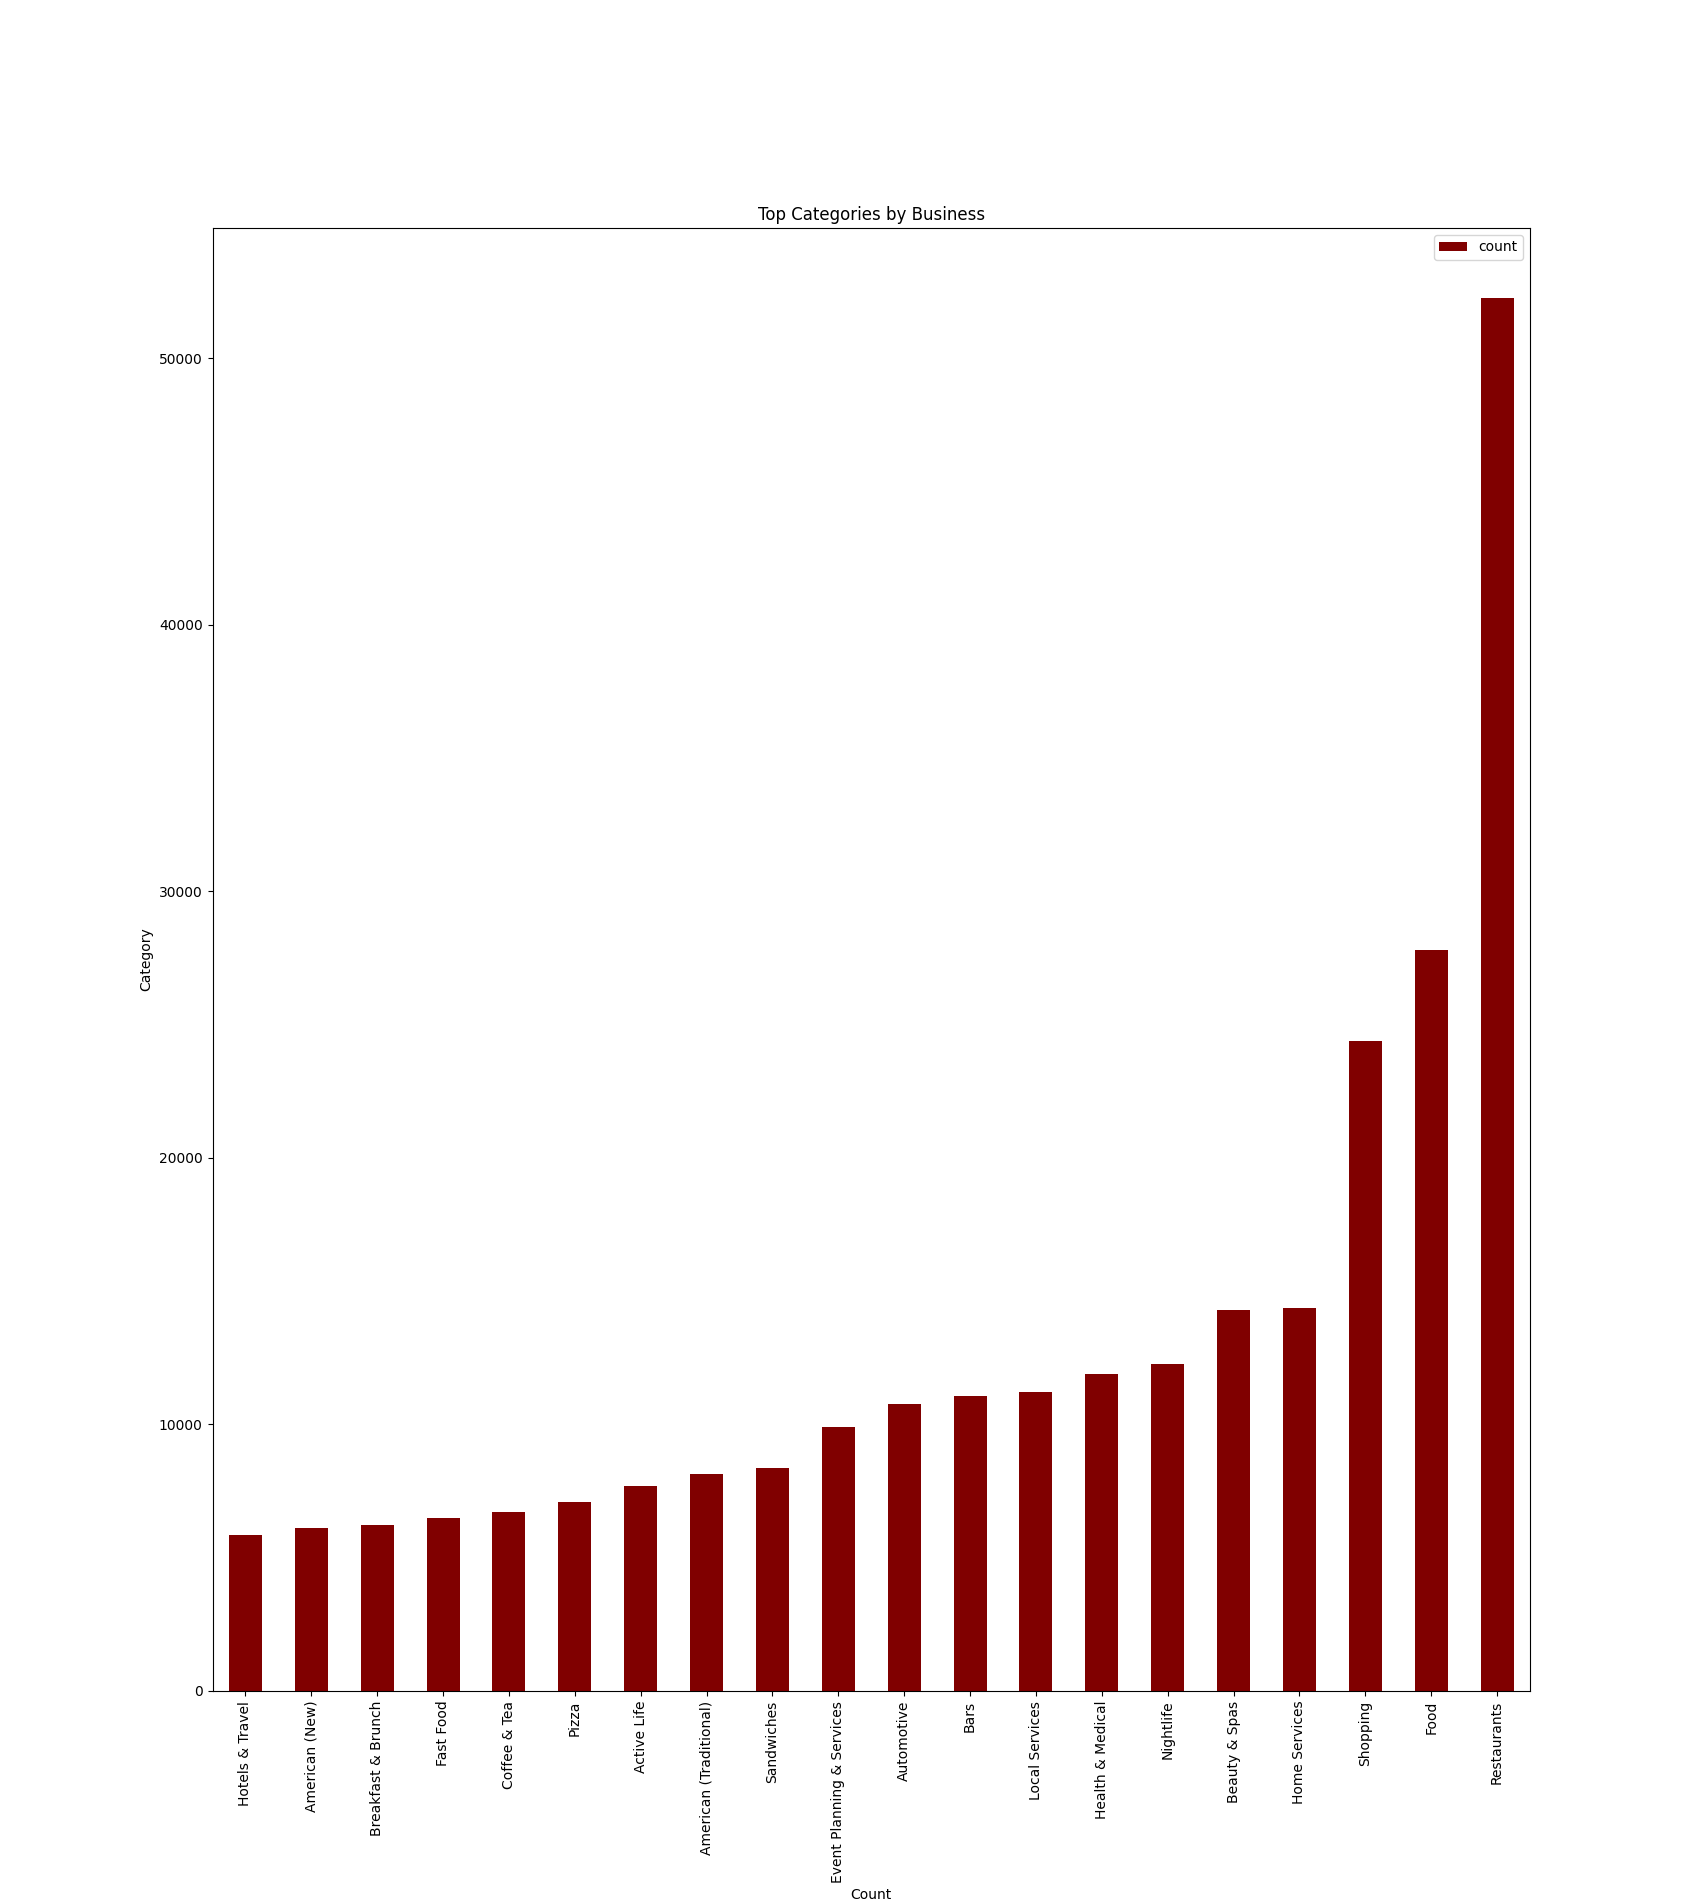

In [20]:
temp.toPandas()\
    .head(20)\
    .sort_values(ascending = True, by='count')\
    .plot.bar(y = 'count', 
               x = 'category', 
               rot=90, 
               title = 'Top Categories by Business', 
               legend = True,
               figsize=(17,19),
               color = 'maroon')\
    .set(xlabel="Count", ylabel = 'Category')\
    


%matplot plt



## Loading User Data

Begin by loading the user data set from S3 and printing schema to determine what data is available. `s3://cis9760-yelpdataset/yelp-light/*review.json`

In [21]:
review_data = spark.read.json('s3://yelp-reviews-dataset/yelp_academic_dataset_review.json')
user_data = spark.read.json('s3://yelp-reviews-dataset/yelp_academic_dataset_user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
review_data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Let's begin by listing the `business_id` and `stars` columns together for the user reviews data.

In [23]:
user_data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

In [24]:
review_data.createOrReplaceTempView("stars")
output = spark.sql('select business_id, stars from stars')
output.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|XQfwVwDr-v0ZS3_Cb...|  3.0|
|7ATYjTIgM3jUlt4UM...|  5.0|
|YjUWPpI6HXG530lwP...|  3.0|
|kxX2SOes4o-D3ZQBk...|  5.0|
|e4Vwtrqf-wpJfwesg...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the `stars` column to get a resultant dataframe that displays _average stars_ per business as accumulated by users who **took the time to submit a written review**.

In [25]:
avg_aggstars = spark.sql('select business_id, avg(stars) as avgstars from stars group by business_id')
avg_aggstars.createOrReplaceTempView("reviews")
avg_aggstars.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|          avgstars|
+--------------------+------------------+
|zJErbOQMKX-MwHs_u...|2.9279279279279278|
|RZ-FNTXvqHKngyLGD...|2.8823529411764706|
|HSzSGdcNaU7heQe0N...|3.3333333333333335|
|skW4boArIApRw9DXK...|2.3947368421052633|
|I0053JmJ5DEFUWSJ8...|2.3956043956043955|
+--------------------+------------------+
only showing top 5 rows

Now the fun part - let's join our two dataframes (reviews and business data) by `business_id`. 

In [26]:
#output = spark.sql(
#'''
#SELECT rev.*, bus.stars, bus.name, bus.city, bus.state 
 #                       from business as bus 
  #                      left join reviews as rev 
   #                     on bus.business_id = rev.business_id''')
#output.createOrReplaceTempView("joinedOutput")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
reviews_only= avg_aggstars.select("business_id","avgstars")
business_only= business_data.select("business_id","name","city","state","stars")
reviews_business= reviews_only.join(business_only, reviews_only.business_id == business_only.business_id, how="left")
reviews_business.select("name","city","state","stars","avgstars").show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+-----+-----+------------------+
|                name|        city|state|stars|          avgstars|
+--------------------+------------+-----+-----+------------------+
|Philadelphia Marr...|Philadelphia|   PA|  3.0|2.9279279279279278|
|Gaetano's of West...| West Berlin|   NJ|  3.0|2.8823529411764706|
|Gillane's Bar & G...|     Ardmore|   PA|  3.0|3.3333333333333335|
|Champps Penn's La...|Philadelphia|   PA|  2.5|2.3947368421052633|
|Golden Corral Buf...|      Tucson|   AZ|  2.5|2.3956043956043955|
|  Swiss Watch Center|       Tampa|   FL|  3.5| 3.357142857142857|
|  NJ Weedman's Joint|     Trenton|   NJ|  4.0| 4.232558139534884|
|       A Able Movers|      Tucson|   AZ|  2.0|             1.875|
|       Numchok Wilai|    Edmonton|   AB|  4.5|               4.3|
|             Safeway|      Sparks|   NV|  3.0|2.8117647058823527|
+--------------------+------------+-----+-----+------------------+
only showing top 10 rows

In [28]:
reviews_business.createOrReplaceTempView("reviews_business")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Let's see a few of these:

Compute a new dataframe that calculates what we will call the _skew_ (for lack of a better word) between the avg stars accumulated from written reviews and the _actual_ star rating of a business (ie: the average of stars given by reviewers who wrote an actual review **and** reviewers who just provided a star rating).

The formula you can use is something like:

```
(row['avg(stars)'] - row['stars']) / row['stars']
```

If the **skew** is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If **skew** is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [29]:
skew_df = spark.sql("select (avgstars-stars)/stars as skew from reviews_business")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

And finally, graph it!

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

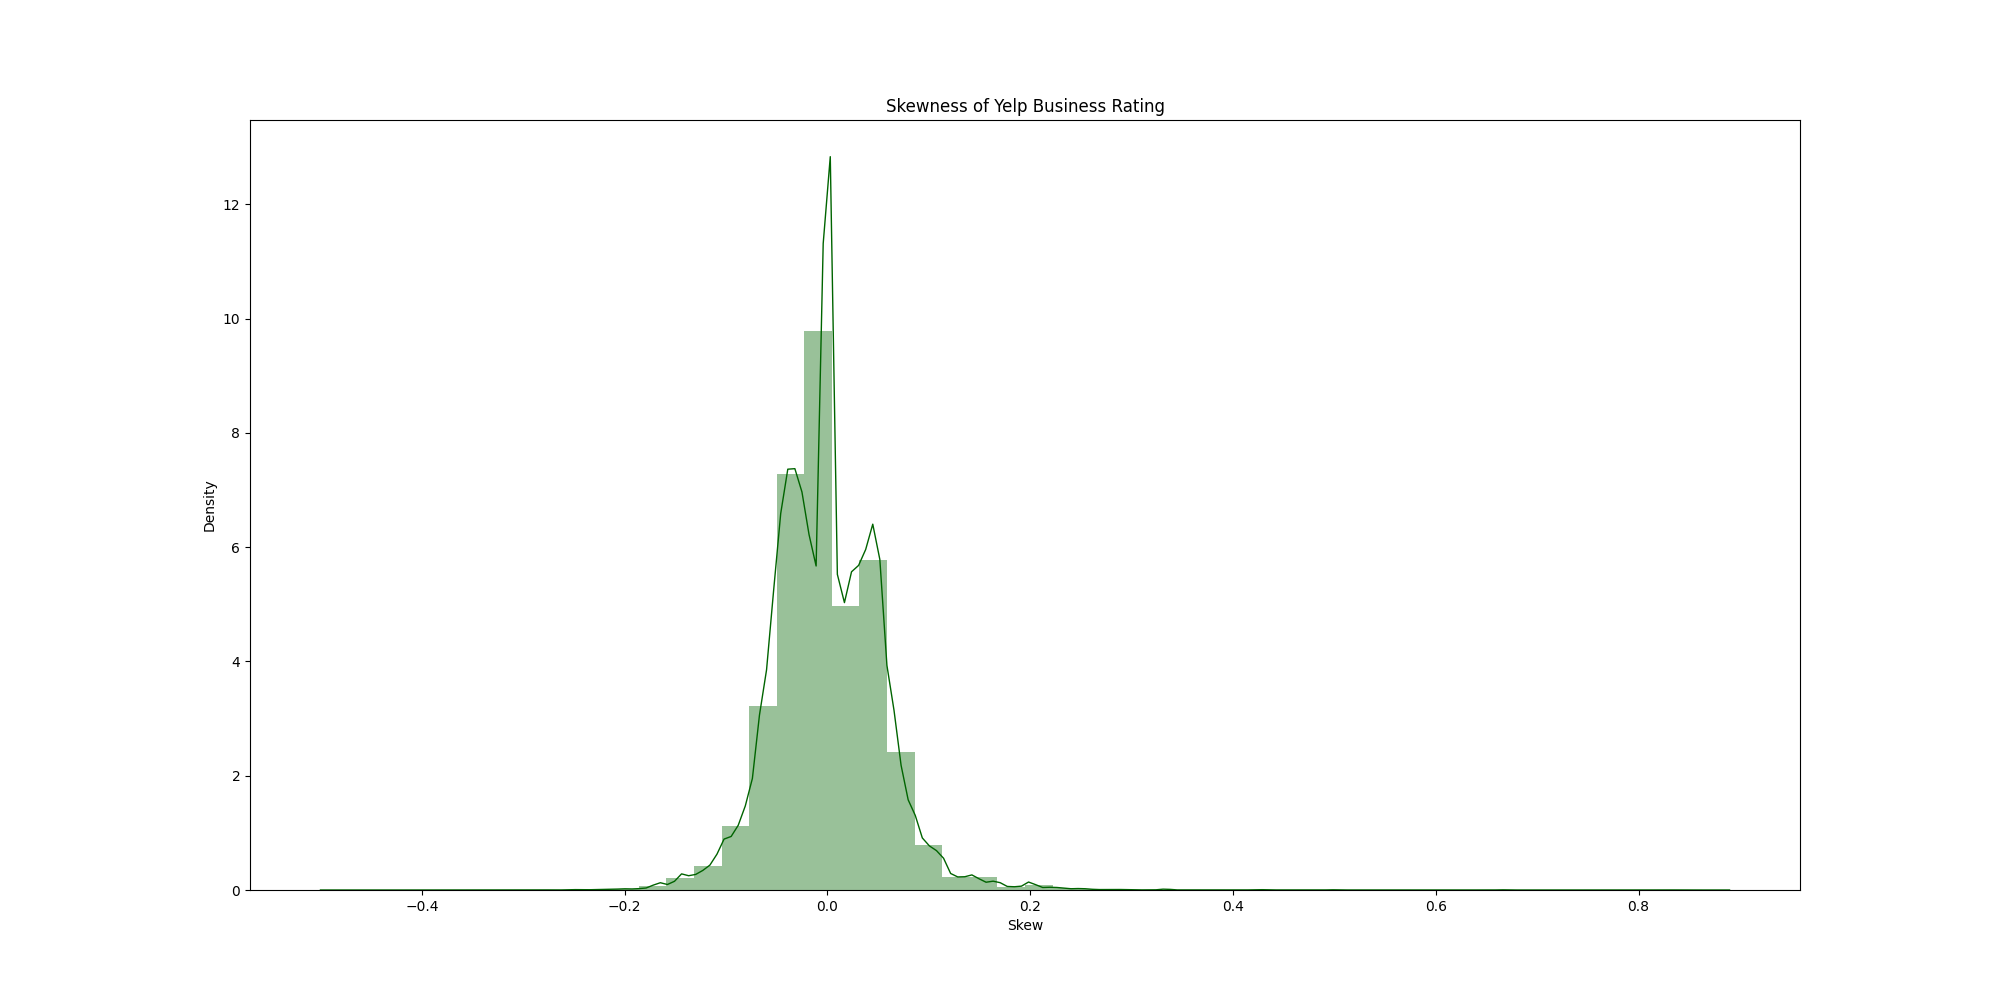

In [30]:
skew_pdf = skew_df.toPandas()

plt.figure(figsize=(20,10))
sns.distplot(skew_pdf['skew'], 
            hist=True, 
            kde=True, 
            bins=50,
            color = 'darkgreen',
            kde_kws={'linewidth':1}).\
    set(title = "Skewness of Yelp Business Rating",
        xlabel = 'Skew')

#plt.xlabel('skew')
#fig.gca()
#fig.set_title=("skewness")
%matplot plt

So, do Yelp (written) Reviews skew negative? Does this analysis actually prove anything? Expound on implications / interpretations of this graph. 



### IMPLICATIONS

Here, we can see that the graph is positively skewed to a slight degree and the graph has a longer tail on the right , this means that there is a greater number of people that have given a negative written review. These could be complains from unsatisfied customers about the restaurant service or ambience or price etc. 



# Should the Elite be Trusted?

How accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating? `s3://cis9760-yelpdataset/yelp-light/*user.json`

Feel free to use any and all methodologies at your disposal. 
You must render one visualization in your analysis and interpret your findings.

In [31]:
user_data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

In [32]:
elite_join = review_data.join(avg_aggstars, review_data.business_id == avg_aggstars.business_id,how='left')
elite_join.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+-----------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|         business_id|         avgstars|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+-----------------+
|--gJkxbsiSIwsQKbi...|   3|2018-11-10 13:11:10|    1|4ww8UA2ZTwGmilBJN...|  4.0|I followed my lon...|     5|fen9BWC39ul9SJZfQ...|--gJkxbsiSIwsQKbi...|4.833333333333333|
|--gJkxbsiSIwsQKbi...|   0|2019-01-10 02:51:06|    0|4SPOoOr1ZZWGm-1Om...|  5.0|Amber is the best...|     0|L4q5nCwMaHhXCeSJz...|--gJkxbsiSIwsQKbi...|4.833333333333333|
|--gJkxbsiSIwsQKbi...|   0|2019-04-18 18:34:40|    0|CSlZvn9wPq6kIahbc...|  5.0|Gina Marotti in L...|     0|XGmxkw2Zbunt5u2ZD...|--gJkxbsiSIwsQKbi...|4.833

In [33]:
#now join this with user data

eluser_review=user_data.join(elite_join, on="user_id", how="inner")

elite_laundey=eluser_review.select('avgstars','stars', 'elite','review_count')
elite_laundey.show(5)

#eluser_review.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+-----+------------+
|          avgstars|stars|elite|review_count|
+------------------+-----+-----+------------+
|3.8430717863105177|  5.0|     |          11|
| 4.625498007968128|  5.0|     |          11|
|3.8030821917808217|  2.0|     |          11|
|              3.05|  1.0|     |           9|
|             3.652|  2.0|     |          50|
+------------------+-----+-----+------------+
only showing top 5 rows

In [34]:
import pyspark.sql.functions as F
review_skew = elite_laundey.withColumn("skew", F.round((F.col('avgstars')-F.col('stars'))/F.col('stars'), 2))

review_skew.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+-----+------------+-----+
|          avgstars|stars|elite|review_count| skew|
+------------------+-----+-----+------------+-----+
|3.8430717863105177|  5.0|     |          11|-0.23|
|3.8030821917808217|  2.0|     |          11|  0.9|
| 4.625498007968128|  5.0|     |          11|-0.07|
|              3.05|  1.0|     |           9| 2.05|
|             3.652|  2.0|     |          50| 0.83|
+------------------+-----+-----+------------+-----+
only showing top 5 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

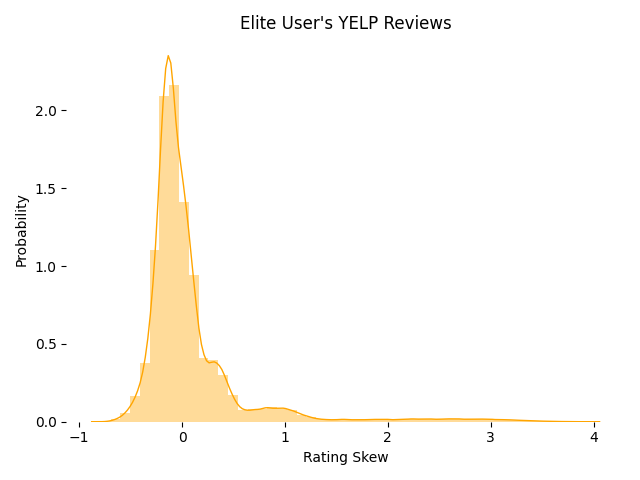

In [35]:
elite_review_skew=review_skew.filter(F.col('elite')!='')

result_pdf = elite_review_skew.toPandas()
plt.figure()
sns.distplot(result_pdf['skew'], 
            hist=True, 
            kde=True, 
            bins=50,
            color = 'orange',
            kde_kws={'linewidth':1})

plt.title('Elite User\'s YELP Reviews')
plt.xlabel('Rating Skew')
plt.ylabel('Probability')
plt.tight_layout()
plt.box(False)

%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

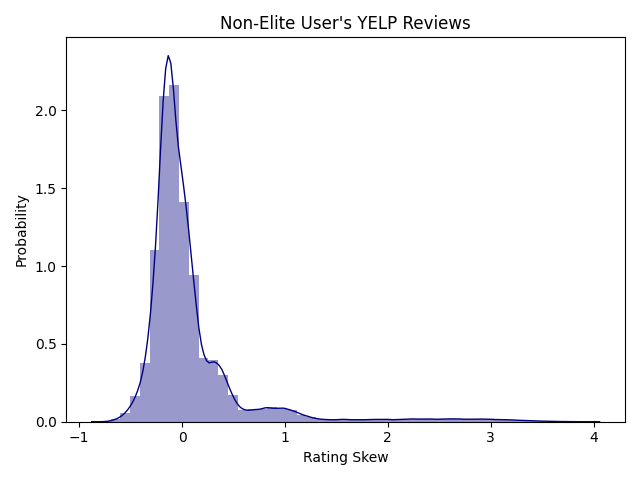

In [36]:
nonelite_review_skew=review_skew.filter(F.col('elite')=='')

result_pdf = elite_review_skew.toPandas()
plt.figure()
sns.distplot(result_pdf['skew'], 
            hist=True, 
            kde=True, 
            bins=50,
            color = 'navy',
            kde_kws={'linewidth':1})

plt.title('Non-Elite User\'s YELP Reviews')
plt.xlabel('Rating Skew')
plt.ylabel('Probability')
plt.tight_layout()
plt.box(True)

%matplot plt

From both the above graphs , it can be clearly gathered that by looking at the skewness of the elite vs non-elite there is'nt significant difference between the two, so it is safe to say that elite users don't have a significant impact on ratings.